In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re

In [2]:
link = "https://github.com/WildCodeSchool/wilddata/raw/main/wine.zip"
df_global = pd.read_csv(link)

print(df_global.shape)
df_global.head()

(129957, 13)


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2019 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
# La bouteille que le client souhaite proposer 
link_domaine_des_croix = "https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/domaine_des_croix.csv"

df_domaine = pd.read_csv(link_domaine_des_croix)
df_domaine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,France,Firm and solid with great swathes of black fru...,NaN,94,NaN,Burgundy,Corton Grèves,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Corton Grèves,Pinot Noir,Domaine des Croix


In [4]:
df = df_global.copy()

In [5]:
#  % des valeurs nulles
df.isnull().sum().sort_values(ascending=False)

region_2                 79446
designation              37460
taster_twitter_handle    31213
taster_name              26244
region_1                 21247
price                     8993
province                    63
country                     63
variety                      1
points                       0
description                  0
title                        0
winery                       0
dtype: int64

In [6]:
#  valeurs manquantes dans la colonnes region_2
df['region_2'].isna().value_counts(normalize=True).mul(100)

region_2
True     61.132528
False    38.867472
Name: proportion, dtype: float64

DISTRIBUTION DES PRIX

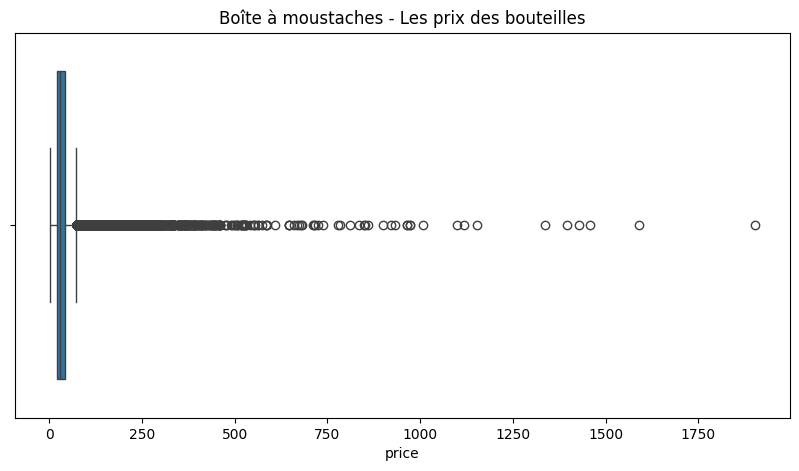

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(df, x='price')
plt.title('Boîte à moustaches - Les prix des bouteilles')

plt.show()

In [8]:
#  Garder que les lignes avec les prix renseignés
df = df[df['price'].isnull() == False]

#  Supprimer la colonne region_2 avec 61% de valeurs manquantes 
df.drop(columns='region_2', inplace=True)
df = df.reset_index(drop=True)

#  La colonne n'est pas utile pour notre analyse : 
df.drop(columns='taster_twitter_handle', inplace=True)

print(df.shape)
df.head()

(120964, 11)


,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian
3,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,20.0,Northern Spain,Navarra,Michael Schachner,Tandem 2017 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [9]:
df['variety'].unique()

array(['Portuguese Red', 'Pinot Gris', 'Riesling', 'Pinot Noir',
       'Tempranillo-Merlot', 'Frappato', 'Gewürztraminer',
       'Cabernet Sauvignon', 'Chardonnay', 'Malbec', 'Tempranillo Blend',
       'Meritage', 'Red Blend', 'White Blend', 'Merlot', "Nero d'Avola",
       'Chenin Blanc', 'Sauvignon Blanc', 'Viognier-Chardonnay',
       'Primitivo', 'Catarratto', 'Gamay', 'Inzolia', 'Petit Verdot',
       'Monica', 'Bordeaux-style White Blend', 'Grillo', 'Sangiovese',
       'Cabernet Franc', 'Champagne Blend', 'Bordeaux-style Red Blend',
       'Aglianico', 'Petite Sirah', 'Carmenère', 'Albariño',
       'Petit Manseng', 'Rosé', 'Zinfandel', 'Vernaccia', 'Rosato',
       'Grüner Veltliner', 'Viognier', 'Vermentino', 'Grenache Blanc',
       'Syrah', 'Nebbiolo', 'Shiraz-Cabernet Sauvignon', 'Pinot Blanc',
       'Alsace white blend', 'Barbera', 'Rhône-style Red Blend',
       'Portuguese White', 'Graciano', 'Tannat-Cabernet', 'Sauvignon',
       'Torrontés', 'Prugnolo Gentile', 'G-

In [10]:
#  Classer les vins en fonction de leurs couleurs
wines = {
    "Rouge": [
        'Portuguese Red', 'Pinot Noir', 'Tempranillo-Merlot', 'Frappato', 'Cabernet Sauvignon',
        'Malbec', 'Tempranillo Blend', 'Meritage', 'Red Blend', 'Merlot', "Nero d'Avola",
        'Primitivo', 'Gamay', 'Petit Verdot', 'Monica', 'Sangiovese', 'Cabernet Franc',
        'Bordeaux-style Red Blend', 'Aglianico', 'Petite Sirah', 'Carmenère', 'Zinfandel',
        'Syrah', 'Nebbiolo', 'Shiraz-Cabernet Sauvignon', 'Barbera', 'Rhône-style Red Blend',
        'Graciano', 'Tannat-Cabernet', 'Bonarda', 'Shiraz', 'Montepulciano', 'Grenache',
        'Blaufränkisch', 'Carignan-Grenache', 'Cabernet Sauvignon-Syrah', 'Tannat', 'Mourvèdre',
        'Pinotage', 'Pinot Noir-Gamay', 'Cabernet Sauvignon-Carmenère', 'Cabernet Franc-Merlot',
        'Sangiovese-Cabernet Sauvignon', 'Touriga Nacional', 'Tempranillo', 'Mencia',
        'Nerello Mascalese', 'Syrah-Grenache', 'Dolcetto', 'Garnacha Tintorera', 'Pinot Nero',
        'Cabernet Sauvignon-Sangiovese', 'Austrian Red Blend', 'Teroldego', 'Sagrantino',
        'Syrah-Petite Sirah', 'Cabernet Blend', 'Gamay Noir', 'Cabernet Franc-Carmenère',
        'Saperavi', 'Tinta Fina', 'St. Laurent', 'Touriga Nacional Blend', 'Cabernet Merlot',
        'Cabernet Sauvignon-Tempranillo', 'Tinta de Toro', 'Ruché', 'Gaglioppo', 'Cabernet',
        'Tannat-Cabernet Franc', 'Pinot Noir-Syrah', 'Malbec-Bonarda', 'Listán Negro',
        'Syrah-Malbec', 'Mavrud', 'Cabernet Sauvignon-Merlot', 'Carignan', 'Merlot-Shiraz',
        'Bobal', 'Negroamaro', 'Piedirosso',
        'Prugnolo Gentile', 'G-S-M', 'Syrah-Viognier', 'Shiraz-Viognier', 'Mencía', 'Zweigelt', 
        'Cannonau', 'Cinsault', 'Monastrell', 'Corvina, Rondinella, Molinara', 'Merlot-Malbec',
        'Tannat-Syrah', 'Charbono', 'Sangiovese Grosso', 'Provence red blend', 'Garnacha',
        'Syrah-Cabernet', 'Baga', 'Malbec-Merlot', 'Monastrell-Syrah', 'Malbec-Tannat', 
        'Malbec-Cabernet Franc', 'Refosco', 'Agiorgitiko', 'Cabernet Moravia', 'Chambourcin', 
        'Lagrein', 'Cesanese', 'Feteasca Neagra', 'Cabernet Sauvignon-Shiraz', 'Syrah-Cabernet Sauvignon', 
        'Grenache-Syrah', 'Cabernet Franc-Cabernet Sauvignon', 'Tempranillo-Cabernet Sauvignon', 
        'Merlot-Cabernet Franc', 'Spätburgunder', 'Plavac Mali', 'Dornfelder', 'Ojaleshi', 
        'Mondeuse', 'Perricone', 'Syrah-Merlot', 'Cabernet Sauvignon-Malbec', 'Tinto Fino',
        'Malbec-Cabernet Sauvignon', 'Carignano', 'Syrah-Petit Verdot', 'Malbec-Syrah', 
        'Barbera-Nebbiolo', 'Prieto Picudo', 'Tempranillo-Garnacha', 'Carmenère-Cabernet Sauvignon', 
        'Grenache-Mourvèdre', 'Cabernet Sauvignon-Barbera', 'Merlot-Cabernet', 'Tempranillo-Shiraz',
        'Tannat-Merlot', 'Merlot-Tannat', 'Syrah-Cabernet Franc', 'Carignan-Syrah', 'Baga-Touriga Nacional',
        'Cabernet Sauvignon-Merlot-Shiraz', 'Malbec-Tempranillo', 'Monastrell-Petit Verdot',
        'Früburgunder', 'Sousão', 'Tinta Miúda', 'Merlot-Argaman', 'Pinot Meunier', 
        'Pugnitello', 'Maturana', 'Lemberger', 'Syrah-Mourvèdre', 'Aleatico', 
        'Carcajolu', 'Magliocco', 'Marselan', 'Schiava', 'Alfrocheiro', 'Norton', 
        'Alicante Bouschet', 'Cabernet-Syrah', 'Grenache Noir', 'Xinomavro', 
        'Tinto del Pais', 'Petite Verdot', 'Valdiguié', 'Uva di Troia', 'Kalecik Karasi', 
        'Karasakiz', 'Mourvèdre-Syrah', 'Negrette', 'Aragonez', 'Raboso', 'País', 
        'Marzemino', 'Tinta Barroca', 'Castelão', 'Teran', 'Trepat', 'Freisa', 'Neuburger', 
        'Nero di Troia', 'Tinta Roriz', 'Trincadeira', 'Melnik', 'Baco Noir', 
        'Touriga Franca', 'Susumaniello', 'Nerello Cappuccio', 'Counoise', 'Mazuelo', 
        'Tinta del Pais', 'Vranec', 'Corvina', "Cesanese d'Affile", 'Duras', 'Jaen', 
        'Tinta del Toro', 'Prunelard', 'Rufete', 'Mtsvane', 'Mataro', 'Tinta Cao', 
        'Blauer Portugieser', 'Poulsard', 'Carineña', 'Ciliegiolo', 'Alicante', 
        'Mavroudi', 'Pallagrello Nero', 'Vespolina', 'Rebo', 'Trousseau', 
        'Rara Neagra', 'Molinara', 'Abouriou', 'Nielluciu', 'Malvasia Nera', 'Portuguiser', 
        'Pinotage-Merlot', 'Grolleau', 'Canaiolo', 'Bombino Nero', 'Bovale', 'Frankovka', 
        'Bastardo', 'Vidadillo', 'Merlot-Syrah', 'Cabernet Pfeffer', 'Babić', 'Mandilaria', 
        'Saperavi-Merlot', 'Uvalino', 'Boğazkere', 'Durif', 'Karalahna', 'Feteasca', 
        'Colorino', 'Ramisco', 'Garnacha-Cabernet', 'Garnacha-Cariñena', 'Gamza', 
        'Cabernet Franc-Lemberger', 'Shiraz-Mourvèdre', 'Mavrokalavryta', 'Babosa Negro', 
        'Tintilia', 'Kotsifali', 'Pignolo', 'Bobal-Cabernet Sauvignon',
        'Papaskarasi', 'Shiraz-Grenache', 'Grenache-Carignan',
        'Lambrusco Grasparossa', 'Merlot-Cabernet Sauvignon',
        'Sangiovese Cabernet', 'Touriga Nacional-Cabernet Sauvignon',
        'Argaman', 'Cabernet Sauvignon-Cabernet Franc', 
        'Tempranillo-Tannat', 'Malbec-Petit Verdot', 'Garnacha-Syrah',
        'Alvarelhão', 'Grenache-Shiraz', 'Malbec-Cabernet',
        'Touriga', 'Carmenère-Syrah', 'Tinto Velasco', 'Mission',
        'Kekfrankos', 'Cabernet Franc-Malbec', 'Shiraz-Malbec',
        'Cariñena-Garnacha', 'Malbec-Carménère', 'Vinhão', 'Souzao',
        'Tinta Francisca', 'Jacquez', 'Mavrotragano', 'Cabernet-Shiraz',
        'Syrah-Carignan', 'Malbec Blend', 'Garnacha-Tempranillo',
        'Merlot-Grenache', 'Vranac', 'Tempranillo-Syrah', 'Cabernet-Malbec',
        'Tinta Amarela', 'Tinta Negra Mole', 'Syrah-Bonarda',
        'Merlot-Petite Verdot',
        'Black Muscat', 'Morillon', 'Carignane', 'Forcallà', 'Manzoni',
        'Syrah-Tempranillo', 'Shiraz-Cabernet', 'Mavrodaphne',
        'Casavecchia', 'Fer Servadou', 'Blauburgunder', 'Marquette',
        'Garnacha-Monastrell', 'Syrah-Grenache-Viognier',
        'Shiraz-Roussanne', 'Gragnano', 'Teroldego Rotaliano',
        'Albarossa', 'Chelois', 'Shiraz-Tempranillo', 'Franconia',
        'Blatina', 'St. Vincent', 'Chancellor', 'Blauburger',
        'Tinta Madeira', 'Centesimino', 'Parraleta', 'Otskhanuri Sapere',
        'Trollinger', 'Tsapournakos', 'Kuntra'
    ],
    "Blanc": [
        'Pinot Gris', 'Riesling', 'Gewürztraminer', 'Chardonnay', 'White Blend',
        'Chenin Blanc', 'Sauvignon Blanc', 'Viognier-Chardonnay', 'Catarratto', 'Inzolia',
        'Grillo', 'Bordeaux-style White Blend', 'Albariño', 'Petit Manseng', 'Vernaccia',
        'Grüner Veltliner', 'Viognier', 'Vermentino', 'Grenache Blanc', 'Pinot Blanc',
        'Alsace white blend', 'Portuguese White', 'Sauvignon', 'Torrontés', 'Verdejo',
        'Fumé Blanc', 'Furmint', 'Pinot Bianco', 'Ugni Blanc-Colombard', 'Friulano',
        'Savagnin', 'Prosecco', 'Sparkling Blend', 'Muscat', 'Muscadelle', 'Pinot Grigio',
        'Cortese', 'Verdejo-Viura', 'Verdicchio', 'Silvaner', 'Colombard', 'Carricante',
        'Roussanne', 'Assyrtiko', 'Roussanne-Viognier', 'Chasselas', 'Viosinho',
        'Sauvignon Blanc-Semillon', 'Chenin Blanc-Chardonnay', 'Trebbiano', 'Macabeo',
        'Sémillon', 'Garganega', 'Treixadura', 'Viura', 'Sylvaner', 'Aligoté', 'Arneis',
        'Malvasia', 'Welschriesling', 'Verdelho', 'Marsanne', 'Scheurebe', 'Kerner',
        'Viognier-Gewürztraminer', 'Falanghina', 'Pecorino', 'Muscat Blanc', 'Godello',
        'Hárslevelü', 'Muskat Ottonel', 'Pinot Blanc-Chardonnay', 'Müller-Thurgau',
        'Moscato', 'Muscadelle', 'Sémillon-Sauvignon Blanc',
        'Assyrtico', 'Vignoles', 'Melon', 'Rhône-style White Blend', 'Vidal', 'Vilana', 'Glera',
        'Antão Vaz', 'Verduzzo', 'Fiano', 'Weissburgunder', 'Ribolla Gialla', 'Roditis', 'Traminer',
        'Marsanne-Roussanne', 'Prié Blanc', 'Zibibbo', 'Pansa Blanca', 'Semillon-Sauvignon Blanc', 
        'Bical', 'Viura-Chardonnay', 'Malvasia Bianca', 'Gelber Muskateller', 'Rieslaner', 
        'Traminette', 'Marsanne-Viognier', 'Cerceal', 'Tocai', 'Fernão Pires', 'Seyval Blanc',
        'Muscat Canelli', 'Arinto', 'Rotgipfler', 'Sauvignon Gris', 'Picpoul', 'Vidal Blanc',
        'Albana', 'Chardonnay-Semillon', 'Loureiro-Arinto', 'Sauvignon Blanc-Chardonnay',
        'Colombard-Sauvignon Blanc', 'Johannisberg Riesling', 'Passerina', 'Chardonnay-Viognier',
        'Chenin Blanc-Sauvignon Blanc', 'Chardonnay-Sauvignon Blanc', 'Gros Manseng', 'Viognier-Roussanne',
        'Pallagrello Bianco', 'Chenin Blanc-Viognier', 'Sauvignon-Sémillon', 'Sauvignon Blanc-Verdejo',
        'Gros Plant', 'Colombard-Ugni Blanc', 'Macabeo-Chardonnay', 'Roussanne-Marsanne',
        'Viognier-Marsanne', 'Sauvignon Blanc-Assyrtiko', 'Chardonnay Weissburgunder',
        'Avesso', 'Chinuri', 'Xarel-lo', 'Greco', 'Insolia', 'Turbiana', 'Alvarinho', 
        'Malagousia', 'Gewürztraminer-Riesling', 'Kinali Yapincak', 'Albanello', 'Altesse', 
        'Blanc du Bois', 'Provence white blend', 'Nosiola', 'Auxerrois', 'Muskat', 
        'Moschofilero', 'Grechetto', 'Encruzado', 'Torbato', 'Garnacha Blanca', 
        'Pallagrello', 'Morava', 'Kisi', 'Zierfandler', 'Palomino', 'Nascetta', 'Siria', 
        'Feteascǎ Regalǎ', 'Tocai Friulano', 'Cercial', 'Roter Veltliner', 'Kangoun', 
        'Loureiro', 'Posip', 'Gros and Petit Manseng', 'Jacquère', 'Clairette', 'Mauzac', 
        'Pinot Auxerrois', 'Diamond', 'Trebbiano Spoletino', 'Rkatsiteli', 'Siegerrebe', 
        'Austrian white blend', 'Sacy', 'Mansois', 'Grignolino', 'Chardonnay-Pinot Gris', 
        'Chardonnay-Pinot Blanc', 'Ugni Blanc', 'Groppello', 'Semillon-Chardonnay', 
        'Irsai Oliver', 'Emir', 'Rosenmuskateller', 'Tsolikouri', 'Narince', 
        'Madeleine Angevine', 'Tempranillo Blanco', 'Aragonês', 'White Riesling', 
        'Hondarrabi Zuri', 'Nuragus', 'Xynisteri', 'Kadarka', 'Sauvignon Musqué', 
        'Doña Blanca', 'Graševina', 'Thrapsathiri', 'Romorantin', 'Bombino Bianco', 
        'Verdejo-Sauvignon Blanc', 'Malvasia-Viura', 'Savatiano', 'Rebula', 'Tamjanika', 
        'Macabeo-Moscatel', 'Plyto', 'Moscatel Graúdo', 'Maria Gomes', 'Malvar', 'Airen', 
        'Erbaluce', 'Verdosilla', 'Biancolella', 'Aidani', 'Greco Bianco', 'Moscatel de Alejandría', 
        'Riesling-Chardonnay', 'Žilavka', 'Chardonnay-Riesling', 'Malagouzia-Chardonnay', 
        'Garnacha Blend', 'Elbling', 'Tokay Pinot Gris', 'Tokay', 'Folle Blanche',
        'Moscadello', 'Symphony', 'Edelzwicker', 'Durella',
        'Trousseau Gris', 'Brachetto', 'Muskateller', 'Malvasia Istriana',
        'Veltliner', 'Piquepoul Blanc', 'Chardonnay-Sauvignon',
        'Vitovska', 'Orange Muscat', 'Grauburgunder', 'Picolit',
        'Moscato Giallo', 'Debit', 'Verdil', 'Verduzzo Friulano',
        "Loin de l'Oeil", 'Coda di Volpe', 'Viura-Verdejo', 'Pinot-Chardonnay',
        "Muscat d'Alexandrie", 'Timorasso', 'Pigato',
        'Sauvignon Blanc-Chenin Blanc', 'Marawi', 'Pignoletto',
        'Muscatel', 'Grecanico', 'Pinot Blanc-Pinot Noir',
        'Muscat Hamburg', 'Pinot Gris-Gewürztraminer',
        'Incrocio Manzoni', 'Terrantez', 'Bual', 'Okuzgozu',
        'Rivaner', 'Códega do Larinho', 'Moschofilero-Chardonnay',
        'Paralleda', 'Malvasia di Candia', 'Muscat of Alexandria',
        'Vespaiolo', 'Orangetraube', 'Maria Gomes-Bical', 'Gouveio',
        'Robola', 'Malagouzia', 'Sämling', 'Morio Muskat', 'Rabigato',
        'Yapincak', 'Sauvignonasse', 'Alvarinho-Chardonnay',
        'Pinot Blanc-Viognier', 'Xinisteri', 'Trebbiano di Lugana',
        'Ryzlink Rýnský', 'Verdeca', 'Cabernet Sauvignon Grenache',
        'Tămâioasă Românească', 'Black Monukka', 'Chardonel',
        'Silvaner-Traminer', 'Merseguera-Sauvignon Blanc',
        'Gelber Traminer', 'Vermentino Nero', 'Cayuga', 'Roussanne-Grenache Blanc',
        'Biancale', 'Ansonica', 'Roviello', 'Sirica', 'Pinot Grigio-Sauvignon Blanc',
        'Sercial', 'Valvin Muscat', 'Malvasia Fina', 'Roditis-Moschofilero',
        'Premsal', 'Jampal', 'Picapoll', 'Chardonnay-Albariño', 'Favorita',
        'Dafni', 'Petit Courbu', 'Moscato di Noto', 'Torontel', 'Athiri',
        'Verduzzo Friulano', 'Mantonico', 'Viognier-Grenache Blanc',
        'Cococciola', 'Azal', 'Roter Traminer', 'Rolle', 'Zlahtina',
        'Misket', 'Tamianka', 'Meseguera', 'Muscadine', 'Trajadura',
        'Catalanesca', 'Viognier-Valdiguié', 'Ondenc', 'Caprettone', 'Verduzzo Friulano ',
        'Asprinio'
    ],
    "Rosé": [
        'Rosé', 'Rosato', 'Portuguese Rosé', 'Rosado',
        'Grenache Rosé', 'Tavel', 'Cinsault Rosé', 'Syrah-Grenache Rosé', 'Pinot Noir Rosé',
        'Mourvèdre Rosé', 'Tempranillo Rosé', 'Cabernet Sauvignon Rosé', 'Provence Rosé', 
        'Garnacha Rosé', 'Zweigelt Rosé',
        'Claret', 'Lambrusco di Sorbara', 'Zierfandler-Rotgipfler', 'Sciaccerellu', 
        'Grenache Gris', 'Grenache Blend', 'Sideritis',
        'Lambrusco Salamino', 'Sangiovese-Syrah', 'Braucol',
        'Grenache-Carignan', 'Schwartzriesling', 'Çalkarası',
        'Tintilia ', 'Francisa', 'Tinta Madeira'
    ],
    "Effervescent": [
        'Champagne Blend', 'Portuguese Sparkling', 'Prosecco', 'Sparkling Blend', 'Lambrusco',
        'Moscato Rosa', 'White Port'
    ],
    "Fortifié/Doux": [
        'Port', 'Sherry', 'Madeira Blend', 'Muscat Blanc à Petits Grains', 'Pedro Ximénez',
        'Moscatel', 'Moscatel Roxo', 'Sauternes', 'Tokaji', 'Vin Santo'
    ]
}

In [11]:
df['robe'] = df['variety'].apply(lambda x: next((k for k, v in wines.items() if x in v), 'Other'))
df.head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,robe
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Rouge
1,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Blanc
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Blanc
3,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Rouge
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,20.0,Northern Spain,Navarra,Michael Schachner,Tandem 2017 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Rouge


In [12]:
#  Garder que les vins 
df_wine = df[(df['robe'] == 'Rouge') | (df['robe'] == 'Blanc') | (df['robe'] == 'Rosé')].reset_index(drop=True)
df_wine.head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,robe
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Rouge
1,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Blanc
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Blanc
3,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Rouge
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,20.0,Northern Spain,Navarra,Michael Schachner,Tandem 2017 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Rouge


In [13]:
#  Remplacer les valeurs nulls dans la colonne country par Inconnu
#  Fonction : 
def replace_missing_values(country: str) -> str: 
    if pd.isnull(country): 
        return 'Inconnu'
    else: 
        return country
    
#  Appliquer la fonction au DataFrame : 
df_wine['country'] = df_wine['country'].apply(replace_missing_values)

In [14]:
countries_coordinates = {
    'Portugal': (39.5, -8),
    'US': (38, -97),
    'Spain': (40, -4),
    'Italy': (42, 12),
    'France': (46, 2),
    'Germany': (51, 9),
    'Argentina': (-34, -64),
    'Chile': (-30, -71),
    'Australia': (-25, 135),
    'Austria': (47.5, 14.5),
    'South Africa': (-29, 24),
    'New Zealand': (-42, 175),
    'Israel': (31.5, 35),
    'Hungary': (47, 20),
    'Greece': (39, 22),
    'Romania': (46, 25),
    'Mexico': (23, -102),
    'Canada': (60, -95),
    'Inconnu': (0, 0),  # Default for unknown
    'Turkey': (39, 35),
    'Czech Republic': (49.75, 15.5),
    'Slovenia': (46, 15),
    'Luxembourg': (49.75, 6),
    'Croatia': (45, 15),
    'Georgia': (42, 44),
    'Uruguay': (-33, -56),
    'England': (52.5, -1.5), # Approximate center
    'Lebanon': (33.85, 35.85),
    'Serbia': (44, 21),
    'Brazil': (-15, -48),
    'Moldova': (47, 29),
    'Morocco': (34, -6),
    'Peru': (-10, -75),
    'India': (20, 77),
    'Bulgaria': (43, 25),
    'Cyprus': (35, 33),
    'Armenia': (40, 45),
    'Switzerland': (47, 8),
    'Bosnia and Herzegovina': (44, 18),
    'Ukraine': (49, 32),
    'Slovakia': (48.75, 20),
    'Macedonia': (41.5, 22),
    'China': (35, 105)
}

In [15]:
df_wine['latitude'] = df_wine['country'].apply(lambda x: next((v[0] for k, v in countries_coordinates.items() if x in k), 'Other'))
df_wine['longitude'] = df_wine['country'].apply(lambda x: next((v[1] for k, v in countries_coordinates.items() if x in k), 'Other'))

df_wine.head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,robe,latitude,longitude
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Rouge,39.5,-8.0
1,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Blanc,38.0,-97.0
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Blanc,38.0,-97.0
3,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Rouge,38.0,-97.0
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,20.0,Northern Spain,Navarra,Michael Schachner,Tandem 2017 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Rouge,40.0,-4.0


In [16]:
df_wine.isna().sum()

country            0
description        0
designation    34747
points             0
price              0
province          59
region_1       19013
taster_name    24306
title              0
variety            0
winery             0
robe               0
latitude           0
longitude          0
dtype: int64

In [17]:
# Traduire en FR les noms des pays : 
df_wine['country'] = df_wine['country'].map({
    'Portugal': 'Portugal', 'US': 'États-Unis', 'Spain': 'Espagne',
    'Italy': 'Italie', 'France': 'France','Germany': 'Allemagne',
    'Argentina': 'Argentine',
    'Chile': 'Chili',
    'Australia': 'Australie',
    'Austria': 'Autriche',
    'South Africa': 'Afrique du Sud',
    'New Zealand': 'Nouvelle-Zélande',
    'Israel': 'Israël',
    'Hungary': 'Hongrie',
    'Greece': 'Grèce',
    'Romania': 'Roumanie',
    'Mexico': 'Mexique',
    'Canada': 'Canada',
    'Inconnu': 'Inconnu',
    'Turkey': 'Turquie',
    'Czech Republic': 'République Tchèque',
    'Slovenia': 'Slovénie',
    'Luxembourg': 'Luxembourg',
    'Croatia': 'Croatie',
    'Georgia': 'Géorgie',
    'Uruguay': 'Uruguay',
    'England': 'Angleterre',
    'Lebanon': 'Liban',
    'Serbia': 'Serbie',
    'Brazil': 'Brésil',
    'Moldova': 'Moldavie',
    'Morocco': 'Maroc',
    'Peru': 'Pérou',
    'India': 'Inde',
    'Bulgaria': 'Bulgarie',
    'Cyprus': 'Chypre',
    'Armenia': 'Arménie',
    'Switzerland': 'Suisse',
    'Bosnia and Herzegovina': 'Bosnie-Herzégovine',
    'Ukraine': 'Ukraine',
    'Slovakia': 'Slovaquie',
    'Macedonia': 'Macédoine',
    'China': 'Chine',
    'Inconnu' : 'Inconnu'
})

In [18]:
def find_millesime(text : str) -> int : 
    text = re.findall(r'20\d{2}|19\d{2}', text)
    if len(text) >= 1: 
        return text[0]

In [19]:
df_wine['millesime'] = df_wine['title'].apply(find_millesime)

df_wine.head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,robe,latitude,longitude,millesime
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Rouge,39.5,-8.0,2017
1,États-Unis,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Blanc,38.0,-97.0,2019
2,États-Unis,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Blanc,38.0,-97.0,2019
3,États-Unis,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Rouge,38.0,-97.0,2018
4,Espagne,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,20.0,Northern Spain,Navarra,Michael Schachner,Tandem 2017 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Rouge,40.0,-4.0,2017


In [20]:
df_wine['millesime'].unique()

array(['2017', '2019', '2018', '2016', '2013', '2015', '2014', '2020',
       '2021', '2022', '2010', '2009', '2012', '2007', '2011', None,
       '2008', '2006', '2005', '1997', '2003', '2002', '2023', '1900',
       '2004', '2001', '1998', '2000', '1931', '1982', '1989', '1994',
       '1986', '1993', '1971', '1979', '1991', '1906', '1988', '1992',
       '1995', '1984', '1921', '1996', '1999', '1936', '1947'],
      dtype=object)

In [22]:
df_wine["country"].value_counts()

country
États-Unis            54100
Italie                16858
France                16703
Espagne                6392
Chili                  4404
Portugal               4368
Argentine              3748
Autriche               2798
Australie              2285
Allemagne              2120
Nouvelle-Zélande       1377
Afrique du Sud         1289
Israël                  489
Grèce                   461
Canada                  253
Bulgarie                141
Hongrie                 122
Roumanie                120
Uruguay                 109
Turquie                  90
Géorgie                  82
Slovénie                 80
Croatie                  71
Mexique                  70
Angleterre               69
Inconnu                  59
Moldavie                 58
Brésil                   40
Liban                    35
Maroc                    28
Pérou                    16
Ukraine                  14
République Tchèque       12
Macédoine                12
Serbie                   12
Chypre      

In [23]:
#  Garder que les pays qui ont plus de 100 bouteilles sur le marché
df_wine = df_wine[df_wine['country'].groupby(df_wine['country']).transform('count') >= 100].reset_index(drop=True)

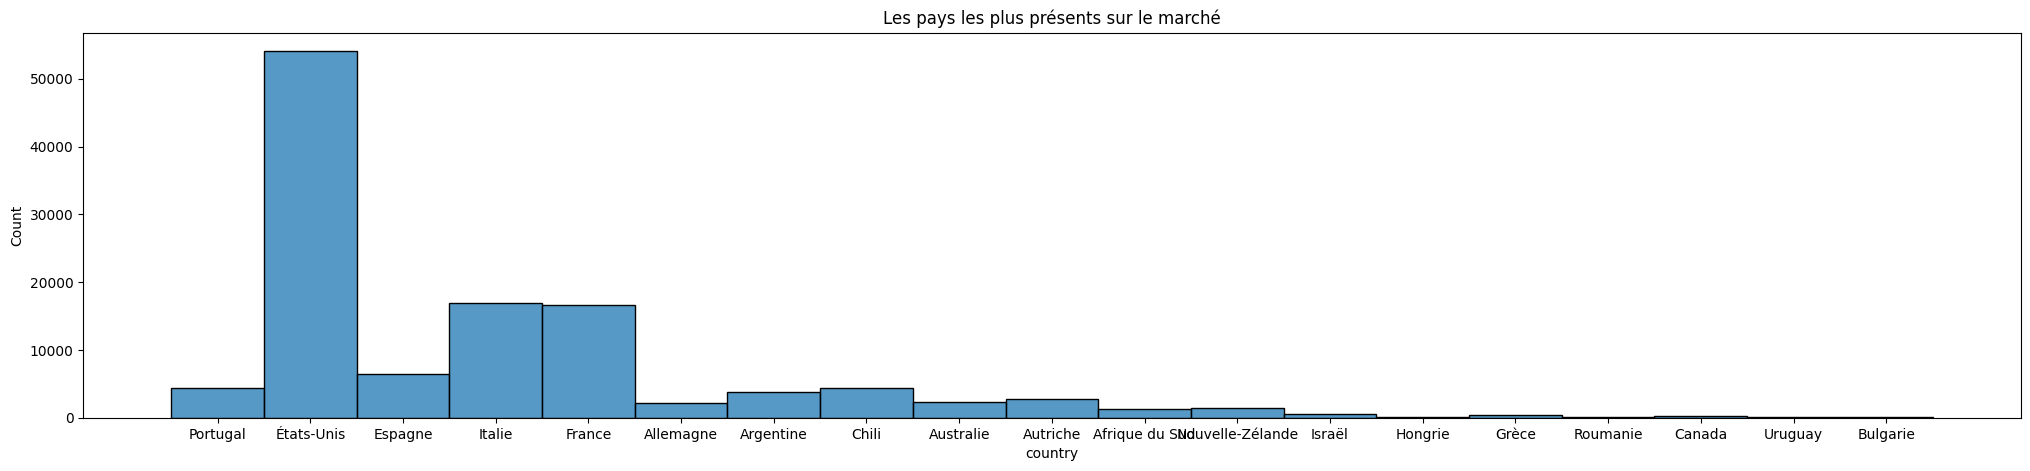

In [24]:
plt.figure(figsize=(25,5))
sns.histplot(df_wine, x='country')
plt.title("Les pays les plus présents sur le marché")

plt.show()

In [25]:
df_pinot = df_wine[df_wine['variety'] == 'Pinot Noir']

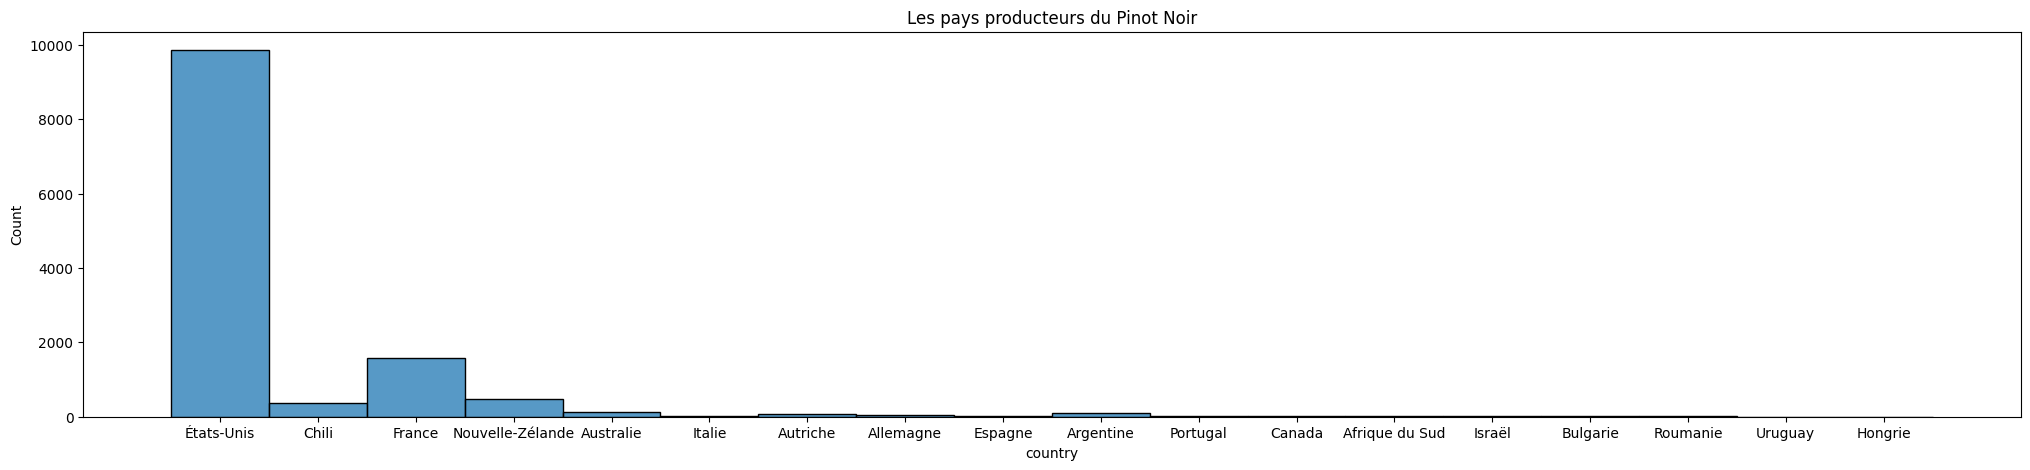

In [27]:
plt.figure(figsize=(25,5))
sns.histplot(df_pinot, x='country')
plt.title("Les pays producteurs du Pinot Noir")

plt.show()

In [28]:
df_wine.rename(columns={'country': 'pays', 'price': 'prix', 'region_1' : 'region', 
                        'taster_name' : 'critique', 'title': 'titre', 
                        'variety': 'cépage', 'winery' : 'établissement vinicole'}, inplace=True)

In [30]:
print(df.shape)
df.head()

(120964, 12)


,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,robe
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Rouge
1,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Blanc
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Blanc
3,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Rouge
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,20.0,Northern Spain,Navarra,Michael Schachner,Tandem 2017 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Rouge


In [ ]:
df_wine.to_parquet("wine.parquet")